In [1]:
# for auto reload when you are working
%load_ext autoreload
%autoreload 2

In [2]:
# in case your path does not register source
import sys
import os
import math

import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# you should now be able to import src
# go to parent dir
# otherwise try os.path.join(os.path.dirname(os.path.realpath(os.getcwd())), 'src')
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
from src.radar import RadarCollection  # this should not throw error
from src.preprocessed_image import PreprocessedImageCollection

In [3]:
# data_path = os.path.join(os.path.dirname(os.path.realpath(os.getcwd())), 'data')
data_path = "../../transfer_221072_files_ec30eaf2/dataset_v1"
aemet_folders_path = os.path.join(*[data_path, 'aemet', '10min'])
radar_path = os.path.join(data_path, 'radars.yaml')
aemet_color_scheme_path = os.path.join(data_path, 'aemet_color_scheme.png')

In [4]:
data_path

'../../transfer_221072_files_ec30eaf2/dataset_v1'

In [5]:
rc = RadarCollection.from_file_path(radar_path)
pic = PreprocessedImageCollection.from_radar_collection_and_aemet_folders_path(rc, aemet_folders_path)

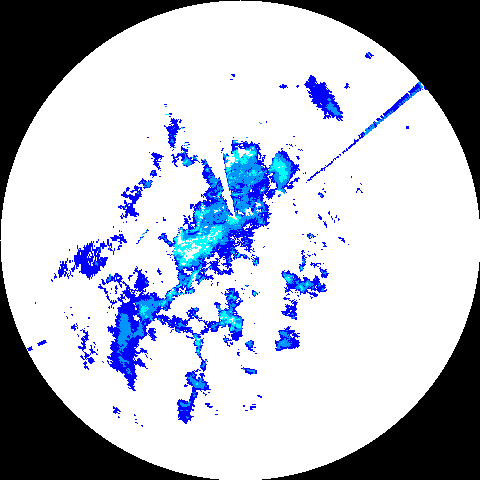

In [22]:
img = pic.get_image(10000).generate_initial_mask()
img

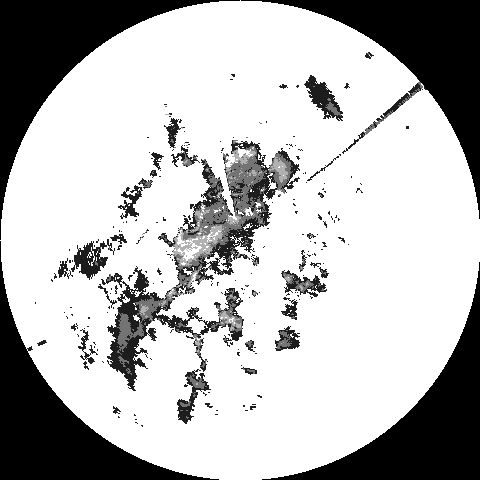

In [23]:
from PIL import Image
gray = img.convert('L')

def is_grey_scale(img):
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b:
                return False
    return True

is_grey_scale(img)
gray

In [24]:
# edges = cv2.Canny(np.asarray(gray),100,200)
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(np.asarray(img), (x1, y1), (x2, y2), (0, 0, 128), 1)
# cv2.imshow("linesEdges", edges)
# cv2.imshow("linesDetected", np.asarray(img))
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# return 0

In [25]:
# dst = cv2.Canny(np.asarray(img), 50, 200, None, 3)
#
# # Copy edges to the images that will display the results in BGR
# dstp = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
#
# # Lets apply Standard HoughLine transform to detect lines
# lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
#
# # Below we will display the result by drawing lines
# if lines is None:
#     print('No Lines.')
# if lines is not None:
#     for i in range(0, len(lines)):
#         rho = lines[i][0][0]
#         theta = lines[i][0][1]
#         a = math.cos(theta)
#         b = math.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         pt1 = (int(x0 + 10000 * (-b)), int(y0 + 10000 * (a)))
#         pt2 = (int(x0 - 10000 * (-b)), int(y0 - 10000 * (a)))
#         cv2.line(dstp, pt1, pt2, (255, 0, 0), 300, cv2.LINE_AA)
#
#
# plt.imshow(dstp)

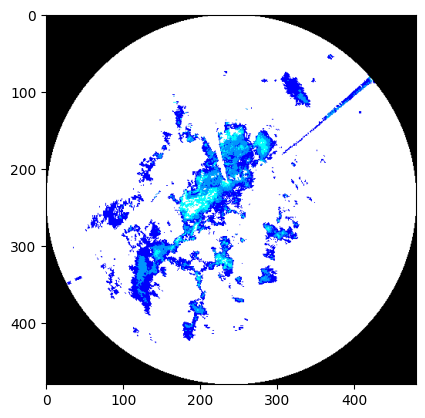

69


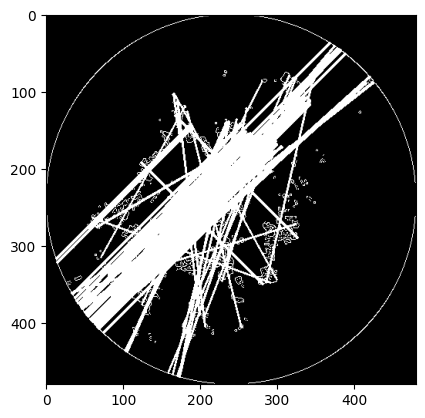

In [26]:
import cv2

# convert to grayscale
# Edge Detection using canny
edges = cv2.Canny(np.asarray(gray), 50, 120)
edges_new = edges

# Define threshold Line Length and Line gap
minLineLength = 5
maxLineGap = 0.001
# Obtain Hough Lines
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 50,minLineLength = 50,maxLineGap = 50)

# Loop though the lines and draw them

if lines is None:
    print('No Lines')

for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)


# Display Output Image
plt.imshow(img)
plt.show()
plt.imshow(edges_new, cmap='gray')
print(len(lines))

(480, 960, 3)

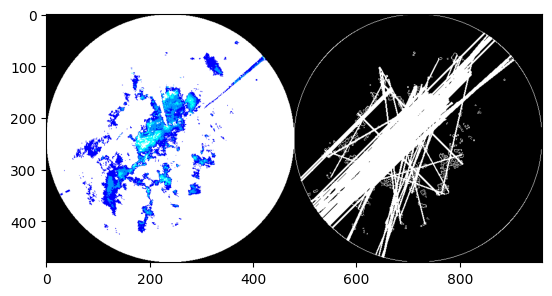

In [27]:
# gray_img = np.hstack((np.asarray(img), np.asarray(edges_new)))
backtorgb = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)
final = np.hstack((img, backtorgb))
plt.imshow(final)
final.shape


In [28]:
lines_list = []
for i in range(len(lines)):
    lines_list.append(list(lines[i][0]))
lines_list

[[110, 359, 419, 81],
 [60, 399, 342, 117],
 [81, 358, 382, 47],
 [64, 403, 299, 168],
 [47, 382, 424, 88],
 [52, 390, 335, 107],
 [45, 380, 262, 163],
 [63, 402, 420, 81],
 [173, 470, 248, 143],
 [58, 397, 342, 113],
 [44, 378, 378, 44],
 [62, 400, 298, 164],
 [84, 365, 335, 114],
 [66, 406, 294, 178],
 [112, 327, 388, 51],
 [46, 382, 382, 46],
 [57, 396, 342, 111],
 [81, 338, 265, 154],
 [54, 392, 339, 107],
 [37, 368, 368, 37],
 [84, 333, 306, 172],
 [68, 408, 305, 171],
 [83, 355, 424, 89],
 [105, 438, 237, 142],
 [81, 340, 252, 143],
 [172, 470, 237, 139],
 [13, 317, 188, 142],
 [51, 387, 294, 135],
 [39, 372, 259, 152],
 [74, 413, 316, 171],
 [65, 404, 292, 177],
 [158, 465, 321, 82],
 [164, 467, 247, 136],
 [50, 387, 380, 45],
 [285, 348, 346, 83],
 [228, 346, 290, 144],
 [166, 103, 299, 344],
 [186, 423, 280, 151],
 [177, 405, 315, 79],
 [183, 126, 253, 406],
 [79, 335, 259, 155],
 [67, 407, 374, 41],
 [106, 312, 256, 151],
 [103, 437, 236, 139],
 [55, 278, 187, 146],
 [119, 34

In [29]:
margin = 30
remove_indexes = []
# plt.imshow(edges_new, cmap='gray')
for index, line in enumerate(lines_list):
    x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
    m = (y2 - y1) / (x2 - x1)
    c = y2 - (m * x2)

    remove = True
    for cx in range(240 - margin, 240 + margin):
        for cy in range(240 - margin, 240 + margin):
            if cy == (m * cx) + c:
                 remove = False

    if remove:
        remove_indexes.append(index)
print('Remove:', remove_indexes)
for ind in remove_indexes:
    lines_list[ind] = []


lines_list = [line for line in lines_list if line != []]
print(lines)

Remove: [0, 2, 4, 7, 8, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 31, 32, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 67]
[[[110 359 419  81]]

 [[ 60 399 342 117]]

 [[ 81 358 382  47]]

 [[ 64 403 299 168]]

 [[ 47 382 424  88]]

 [[ 52 390 335 107]]

 [[ 45 380 262 163]]

 [[ 63 402 420  81]]

 [[173 470 248 143]]

 [[ 58 397 342 113]]

 [[ 44 378 378  44]]

 [[ 62 400 298 164]]

 [[ 84 365 335 114]]

 [[ 66 406 294 178]]

 [[112 327 388  51]]

 [[ 46 382 382  46]]

 [[ 57 396 342 111]]

 [[ 81 338 265 154]]

 [[ 54 392 339 107]]

 [[ 37 368 368  37]]

 [[ 84 333 306 172]]

 [[ 68 408 305 171]]

 [[ 83 355 424  89]]

 [[105 438 237 142]]

 [[ 81 340 252 143]]

 [[172 470 237 139]]

 [[ 13 317 188 142]]

 [[ 51 387 294 135]]

 [[ 39 372 259 152]]

 [[ 74 413 316 171]]

 [[ 65 404 292 177]]

 [[158 465 321  82]]

 [[164 467 247 136]]

 [[ 50 387 380  45]]

 [[285 348 346  83]]

 [[228 346 290 144]]

 [[166 103 299 344]]

In [30]:
lines_list
lines_list = [line for line in lines_list if line != []]
len(lines_list)

23

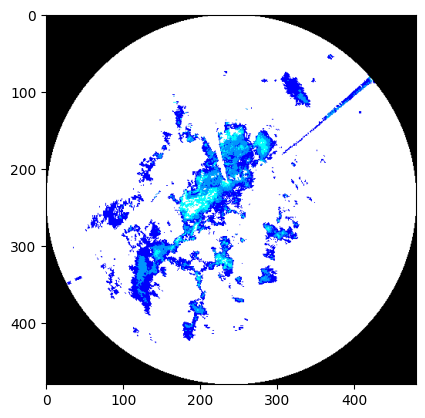

69


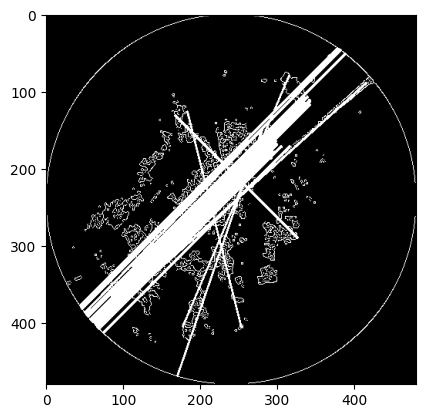

In [31]:
edges = cv2.Canny(np.asarray(gray), 50, 120)
edges_new = edges

# Define threshold Line Length and Line gap
minLineLength = 5
maxLineGap = 0.001
# Obtain Hough Lines
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)

if lines is None:
    print('No Lines')

for i, line in enumerate(lines_list):
    x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
    edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)


# Display Output Image
plt.imshow(img)
plt.show()
plt.imshow(edges_new, cmap='gray')
print(len(lines))
plt.imshow(edges_new, cmap='gray')

In [32]:
from scipy.spatial import distance

radius = 150
remove_indexes = []

center = (240, 240)

for index, line in enumerate(lines_list):
    p1, p2 =  (line[0], line[1]), (line[2], line[3])

    dst1 = distance.euclidean(p1, center)
    dst2 = distance.euclidean(p2, center)

    if dst1 < radius or dst2 < radius:
        remove_indexes.append(index)

for ind in remove_indexes:
    lines_list[ind] = []

lines_list = [line for line in lines_list if line != []]
print(len(lines_list))

12


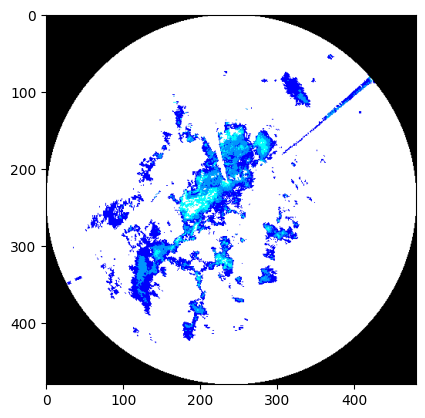

69


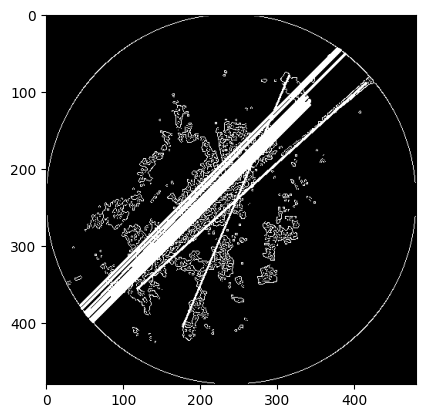

In [33]:
edges = cv2.Canny(np.asarray(gray), 50, 120)
edges_new = edges

# Define threshold Line Length and Line gap
minLineLength = 5
maxLineGap = 0.001
# Obtain Hough Lines
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)

if lines is None:
    print('No Lines')

for i, line in enumerate(lines_list):
    x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
    edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)


# Display Output Image
plt.imshow(img)
plt.show()
plt.imshow(edges_new, cmap='gray')
print(len(lines))
plt.imshow(edges_new, cmap='gray')

In [ ]:
# in case your path does not register source
import sys
import os
import math

import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# you should now be able to import src
# go to parent dir
# otherwise try os.path.join(os.path.dirname(os.path.realpath(os.getcwd())), 'src')
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
from src.radar import RadarCollection  # this should not throw error
from src.preprocessed_image import PreprocessedImageCollection

In [ ]:
# data_path = os.path.join(os.path.dirname(os.path.realpath(os.getcwd())), 'data')
data_path = "../../transfer_221072_files_ec30eaf2/dataset_v1"
aemet_folders_path = os.path.join(*[data_path, 'aemet', '10min'])
radar_path = os.path.join(data_path, 'radars.yaml')
aemet_color_scheme_path = os.path.join(data_path, 'aemet_color_scheme.png')

In [ ]:
data_path

In [ ]:
rc = RadarCollection.from_file_path(radar_path)
pic = PreprocessedImageCollection.from_radar_collection_and_aemet_folders_path(rc, aemet_folders_path)

In [ ]:
img = pic.get_image(10000).generate_initial_mask()
img

In [ ]:
from PIL import Image
gray = img.convert('L')

def is_grey_scale(img):
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b:
                return False
    return True

is_grey_scale(img)
gray

In [ ]:
# edges = cv2.Canny(np.asarray(gray),100,200)
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(np.asarray(img), (x1, y1), (x2, y2), (0, 0, 128), 1)
# cv2.imshow("linesEdges", edges)
# cv2.imshow("linesDetected", np.asarray(img))
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# return 0

In [ ]:
# dst = cv2.Canny(np.asarray(img), 50, 200, None, 3)
#
# # Copy edges to the images that will display the results in BGR
# dstp = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
#
# # Lets apply Standard HoughLine transform to detect lines
# lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
#
# # Below we will display the result by drawing lines
# if lines is None:
#     print('No Lines.')
# if lines is not None:
#     for i in range(0, len(lines)):
#         rho = lines[i][0][0]
#         theta = lines[i][0][1]
#         a = math.cos(theta)
#         b = math.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         pt1 = (int(x0 + 10000 * (-b)), int(y0 + 10000 * (a)))
#         pt2 = (int(x0 - 10000 * (-b)), int(y0 - 10000 * (a)))
#         cv2.line(dstp, pt1, pt2, (255, 0, 0), 300, cv2.LINE_AA)
#
#
# plt.imshow(dstp)

In [ ]:
import cv2

# convert to grayscale
# Edge Detection using canny
edges = cv2.Canny(np.asarray(gray), 50, 120)
edges_new = edges

# Define threshold Line Length and Line gap
minLineLength = 5
maxLineGap = 0.001
# Obtain Hough Lines
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 50,minLineLength = 50,maxLineGap = 50)

# Loop though the lines and draw them

if lines is None:
    print('No Lines')

for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)


# Display Output Image
plt.imshow(img)
plt.show()
plt.imshow(edges_new, cmap='gray')
print(len(lines))

In [ ]:
# gray_img = np.hstack((np.asarray(img), np.asarray(edges_new)))
backtorgb = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)
final = np.hstack((img, backtorgb))
plt.imshow(final)
final.shape


In [ ]:
lines_list = []
for i in range(len(lines)):
    lines_list.append(list(lines[i][0]))
lines_list

In [ ]:
margin = 30
remove_indexes = []
# plt.imshow(edges_new, cmap='gray')
for index, line in enumerate(lines_list):
    x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
    m = (y2 - y1) / (x2 - x1)
    c = y2 - (m * x2)

    remove = True
    for cx in range(240 - margin, 240 + margin):
        for cy in range(240 - margin, 240 + margin):
            if cy == (m * cx) + c:
                 remove = False

    if remove:
        remove_indexes.append(index)
print('Remove:', remove_indexes)
for ind in remove_indexes:
    lines_list[ind] = []


lines_list = [line for line in lines_list if line != []]
print(lines)

In [ ]:
lines_list
lines_list = [line for line in lines_list if line != []]
len(lines_list)

In [ ]:
edges = cv2.Canny(np.asarray(gray), 50, 120)
edges_new = edges

# Define threshold Line Length and Line gap
minLineLength = 5
maxLineGap = 0.001
# Obtain Hough Lines
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)

if lines is None:
    print('No Lines')

for i, line in enumerate(lines_list):
    x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
    edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)


# Display Output Image
plt.imshow(img)
plt.show()
plt.imshow(edges_new, cmap='gray')
print(len(lines))
plt.imshow(edges_new, cmap='gray')

In [ ]:
from scipy.spatial import distance

plt.imshow(edges_new, cmap='gray')

for line in lines_list:
    p1, p2 =  (line[0], line[1]), (line[2], line[3])
    dst1 = distance.euclidean(p1, p2)
    dst1 = distance.euclidean(p1, p2)




In [ ]:
result_img = img
for i, line in enumerate(lines_list):
    x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
    result_img = cv2.line(np.asarray(result_img), (x1,y1), (x2,y2), (255,255,255), 2)

plt.imshow(result_img)

In [ ]:
results_path = '../../line_results/'
for i in tqdm(range(0, pic.size(), 100)):
    img = pic.get_image(i).generate_initial_mask()
    gray = img.convert('L')

    # convert to grayscale
    # Edge Detection using canny
    edges = cv2.Canny(np.asarray(gray), 50, 120)
    edges_new = edges

    lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 50,minLineLength = 50,maxLineGap = 50)

    if lines is None:
        print('No Lines')
        cv2.imwrite(results_path + str(i) + '.png', np.asarray(img))
    else:
        for i in range(len(lines)):
            for x1,y1,x2,y2 in lines[i]:
                edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)

        backtorgb1 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        lines_list = []
        for i in range(len(lines)):
            lines_list.append(list(lines[i][0]))

        margin = 20
        remove_indexes = []
        # plt.imshow(edges_new, cmap='gray')
        for index, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            m = (y2 - y1) / (x2 - x1)
            c = y2 - (m * x2)

            remove = True
            for cx in range(240 - margin, 240 + margin):
                for cy in range(240 - margin, 240 + margin):
                    if cy == (m * cx) + c:
                        remove = False

            if remove:
                remove_indexes.append(index)
        # print('Remove:', remove_indexes)
        for ind in remove_indexes:
            lines_list[ind] = []

        lines_list = [line for line in lines_list if line != []]


        # edges = cv2.Canny(np.asarray(gray), 50, 120)
        edges = cv2.Canny(np.asarray(gray), 50, 120)
        edges_new = edges


    # Define threshold Line Length and Line gap
        minLineLength = 5
        maxLineGap = 0.001
        # Obtain Hough Lines
        # lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)


        if lines is None:
            print('No Lines')

        for i, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)


        backtorgb2 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        final = np.hstack((img, backtorgb1, backtorgb2))
        # plt.imshow(final)
        cv2.imwrite(results_path + str(i) + '.png', final)

In [ ]:
pic.size()

In [ ]:
def detect_interferences(img, margin):
    gray = img.convert('L')

    edges = cv2.Canny(np.asarray(gray), 50, 120)
    edges_new = edges

    lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 50,minLineLength = 50,maxLineGap = 50)

    if lines is None:
        return [], img
    else:
        for i in range(len(lines)):
            for x1,y1,x2,y2 in lines[i]:
                edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)

        backtorgb1 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        lines_list = []
        for i in range(len(lines)):
            lines_list.append(list(lines[i][0]))

        remove_indexes = []
        # plt.imshow(edges_new, cmap='gray')
        for index, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            m = (y2 - y1) / (x2 - x1)
            c = y2 - (m * x2)

            remove = True
            for cx in range(240 - margin, 240 + margin):
                for cy in range(240 - margin, 240 + margin):
                    if cy == (m * cx) + c:
                        remove = False

            if remove:
                remove_indexes.append(index)
        # print('Remove:', remove_indexes)
        for ind in remove_indexes:
            lines_list[ind] = []

        lines_list = [line for line in lines_list if line != []]

        edges = cv2.Canny(np.asarray(gray), 50, 120)
        edges_new = edges


        if lines is None:
            print('No Lines')

        for i, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)

        backtorgb2 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        final = np.hstack((img, backtorgb1, backtorgb2))
        return lines_list, final

In [ ]:
img = pic.get_image(1000).generate_initial_mask()

lines, im = detect_interferences(img, 20)
print(lines)
plt.imshow(im)

In [ ]:
def draw_white_lines(img, lines, width=2):
    for i, line in enumerate(lines_list):
        x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
        img = cv2.line(np.asarray(img), (x1,y1), (x2,y2), (255,255,255), width)

    plt.imshow(result_img)
draw_white_lines(img, lines)

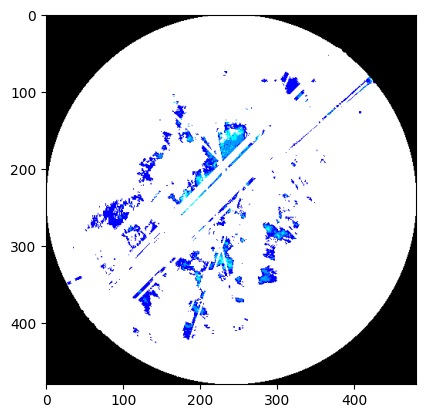

In [19]:
result_img = img
for i, line in enumerate(lines_list):
    x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
    result_img = cv2.line(np.asarray(result_img), (x1,y1), (x2,y2), (255,255,255), 2)

plt.imshow(result_img)

In [25]:
results_path = '../../line_results/'
for i in tqdm(range(0, pic.size(), 100)):
    img = pic.get_image(i).generate_initial_mask()
    gray = img.convert('L')

    # convert to grayscale
    # Edge Detection using canny
    edges = cv2.Canny(np.asarray(gray), 50, 120)
    edges_new = edges

    lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 50,minLineLength = 50,maxLineGap = 50)

    if lines is None:
        print('No Lines')
        cv2.imwrite(results_path + str(i) + '.png', np.asarray(img))
    else:
        for i in range(len(lines)):
            for x1,y1,x2,y2 in lines[i]:
                edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)

        backtorgb1 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        lines_list = []
        for i in range(len(lines)):
            lines_list.append(list(lines[i][0]))

        margin = 20
        remove_indexes = []
        # plt.imshow(edges_new, cmap='gray')
        for index, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            m = (y2 - y1) / (x2 - x1)
            c = y2 - (m * x2)

            remove = True
            for cx in range(240 - margin, 240 + margin):
                for cy in range(240 - margin, 240 + margin):
                    if cy == (m * cx) + c:
                        remove = False

            if remove:
                remove_indexes.append(index)
        # print('Remove:', remove_indexes)
        for ind in remove_indexes:
            lines_list[ind] = []

        lines_list = [line for line in lines_list if line != []]


        # edges = cv2.Canny(np.asarray(gray), 50, 120)
        edges = cv2.Canny(np.asarray(gray), 50, 120)
        edges_new = edges


    # Define threshold Line Length and Line gap
        minLineLength = 5
        maxLineGap = 0.001
        # Obtain Hough Lines
        # lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)


        if lines is None:
            print('No Lines')

        for i, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)


        backtorgb2 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        final = np.hstack((img, backtorgb1, backtorgb2))
        # plt.imshow(final)
        cv2.imwrite(results_path + str(i) + '.png', final)

  4%|▍         | 17/385 [00:34<12:22,  2.02s/it]

No Lines


  5%|▌         | 20/385 [00:41<12:33,  2.07s/it]

No Lines


  6%|▌         | 23/385 [00:47<12:50,  2.13s/it]

No Lines


  8%|▊         | 30/385 [01:01<12:13,  2.07s/it]

No Lines


 11%|█         | 43/385 [01:28<11:21,  1.99s/it]

No Lines


 13%|█▎        | 50/385 [01:43<11:30,  2.06s/it]

No Lines


 14%|█▍        | 53/385 [01:49<11:21,  2.05s/it]

No Lines


 19%|█▉        | 73/385 [02:31<10:28,  2.01s/it]

No Lines


 22%|██▏       | 86/385 [02:57<10:15,  2.06s/it]

No Lines


 26%|██▌       | 100/385 [03:26<09:48,  2.06s/it]

No Lines


 26%|██▌       | 101/385 [03:29<09:45,  2.06s/it]/tmp/ipykernel_34850/2961377529.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  m = (y2 - y1) / (x2 - x1)
/tmp/ipykernel_34850/2961377529.py:38: RuntimeWarning: invalid value encountered in scalar add
  if cy == (m * cx) + c:
 27%|██▋       | 103/385 [03:33<09:39,  2.05s/it]

No Lines


 28%|██▊       | 106/385 [03:39<09:19,  2.01s/it]

No Lines


 30%|███       | 116/385 [03:59<09:03,  2.02s/it]

No Lines


 35%|███▌      | 135/385 [04:38<08:35,  2.06s/it]

No Lines


 35%|███▌      | 136/385 [04:40<08:20,  2.01s/it]

No Lines


 36%|███▌      | 137/385 [04:41<08:11,  1.98s/it]

No Lines


 39%|███▊      | 149/385 [05:05<07:43,  1.96s/it]

No Lines


 42%|████▏     | 162/385 [05:32<07:21,  1.98s/it]

No Lines


 46%|████▌     | 178/385 [06:05<07:27,  2.16s/it]

No Lines


 48%|████▊     | 183/385 [06:16<07:06,  2.11s/it]

No Lines


 48%|████▊     | 184/385 [06:18<07:11,  2.15s/it]

No Lines


 50%|████▉     | 191/385 [06:33<06:56,  2.15s/it]

No Lines


 50%|████▉     | 192/385 [06:35<06:46,  2.11s/it]

No Lines


 51%|█████     | 195/385 [06:41<06:42,  2.12s/it]

No Lines


 51%|█████▏    | 198/385 [06:48<06:41,  2.15s/it]

No Lines


 52%|█████▏    | 201/385 [06:54<06:36,  2.15s/it]

No Lines


 54%|█████▍    | 208/385 [07:08<06:04,  2.06s/it]

No Lines


 55%|█████▍    | 210/385 [07:12<05:39,  1.94s/it]

No Lines


 55%|█████▍    | 211/385 [07:14<05:42,  1.97s/it]

No Lines


 56%|█████▌    | 214/385 [07:20<05:43,  2.01s/it]

No Lines


 56%|█████▌    | 215/385 [07:22<05:49,  2.06s/it]

No Lines


 56%|█████▋    | 217/385 [07:26<05:43,  2.05s/it]

No Lines


 57%|█████▋    | 218/385 [07:28<05:38,  2.03s/it]

No Lines


 57%|█████▋    | 221/385 [07:34<05:27,  2.00s/it]

No Lines


 58%|█████▊    | 224/385 [07:41<05:25,  2.02s/it]

No Lines


 59%|█████▊    | 226/385 [07:45<05:19,  2.01s/it]

No Lines


 59%|█████▉    | 227/385 [07:47<05:13,  1.98s/it]

No Lines


 59%|█████▉    | 228/385 [07:48<05:10,  1.98s/it]

No Lines


 59%|█████▉    | 229/385 [07:51<05:15,  2.02s/it]

No Lines


 60%|█████▉    | 230/385 [07:53<05:12,  2.02s/it]

No Lines


 60%|██████    | 231/385 [07:55<05:06,  1.99s/it]

No Lines


 61%|██████    | 233/385 [07:59<05:15,  2.08s/it]

No Lines


 61%|██████    | 234/385 [08:01<05:07,  2.04s/it]

No Lines


 61%|██████    | 235/385 [08:03<05:06,  2.04s/it]

No Lines


 61%|██████▏   | 236/385 [08:05<05:04,  2.04s/it]

No Lines


 62%|██████▏   | 237/385 [08:07<05:00,  2.03s/it]

No Lines


 62%|██████▏   | 238/385 [08:09<04:52,  1.99s/it]

No Lines


 62%|██████▏   | 239/385 [08:11<04:54,  2.02s/it]

No Lines


 62%|██████▏   | 240/385 [08:13<05:00,  2.07s/it]

No Lines


 63%|██████▎   | 241/385 [08:15<04:52,  2.03s/it]

No Lines


 63%|██████▎   | 242/385 [08:17<04:43,  1.98s/it]

No Lines


 63%|██████▎   | 244/385 [08:21<04:51,  2.07s/it]

No Lines


 64%|██████▎   | 245/385 [08:23<04:47,  2.06s/it]

No Lines


 64%|██████▍   | 246/385 [08:25<04:46,  2.06s/it]

No Lines


 64%|██████▍   | 248/385 [08:30<04:44,  2.08s/it]

No Lines


 65%|██████▍   | 249/385 [08:31<04:30,  1.99s/it]

No Lines


 65%|██████▍   | 250/385 [08:33<04:25,  1.97s/it]

No Lines


 65%|██████▌   | 251/385 [08:35<04:29,  2.01s/it]

No Lines


 65%|██████▌   | 252/385 [08:37<04:23,  1.98s/it]

No Lines


 66%|██████▌   | 253/385 [08:39<04:14,  1.93s/it]

No Lines


 66%|██████▌   | 254/385 [08:41<04:22,  2.00s/it]

No Lines


 66%|██████▌   | 255/385 [08:43<04:16,  1.97s/it]

No Lines


 67%|██████▋   | 257/385 [08:47<04:14,  1.99s/it]

No Lines


 67%|██████▋   | 258/385 [08:49<04:23,  2.08s/it]

No Lines


 67%|██████▋   | 259/385 [08:51<04:19,  2.06s/it]

No Lines


 68%|██████▊   | 260/385 [08:53<04:13,  2.03s/it]

No Lines


 68%|██████▊   | 263/385 [08:59<04:04,  2.00s/it]

No Lines


 69%|██████▊   | 264/385 [09:02<04:03,  2.01s/it]

No Lines


 69%|██████▉   | 266/385 [09:06<04:11,  2.11s/it]

No Lines


 69%|██████▉   | 267/385 [09:08<04:01,  2.05s/it]

No Lines


 70%|██████▉   | 268/385 [09:10<03:58,  2.04s/it]

No Lines


 70%|██████▉   | 269/385 [09:12<03:54,  2.02s/it]

No Lines


 70%|███████   | 270/385 [09:14<03:48,  1.99s/it]

No Lines


 71%|███████   | 272/385 [09:18<03:41,  1.96s/it]

No Lines


 71%|███████   | 273/385 [09:20<03:42,  1.99s/it]

No Lines


 71%|███████   | 274/385 [09:22<03:43,  2.01s/it]

No Lines


 71%|███████▏  | 275/385 [09:24<03:47,  2.07s/it]

No Lines


 72%|███████▏  | 276/385 [09:26<03:44,  2.06s/it]

No Lines


 72%|███████▏  | 278/385 [09:30<03:38,  2.05s/it]

No Lines


 72%|███████▏  | 279/385 [09:32<03:36,  2.04s/it]

No Lines


 73%|███████▎  | 280/385 [09:34<03:27,  1.98s/it]

No Lines


 73%|███████▎  | 281/385 [09:36<03:21,  1.94s/it]

No Lines


 73%|███████▎  | 282/385 [09:38<03:23,  1.97s/it]

No Lines


 74%|███████▎  | 283/385 [09:40<03:21,  1.98s/it]

No Lines


 74%|███████▍  | 284/385 [09:42<03:18,  1.97s/it]

No Lines


 74%|███████▍  | 285/385 [09:44<03:14,  1.95s/it]

No Lines


 74%|███████▍  | 286/385 [09:46<03:18,  2.01s/it]

No Lines


 75%|███████▍  | 287/385 [09:48<03:15,  1.99s/it]

No Lines


 75%|███████▍  | 288/385 [09:50<03:09,  1.96s/it]

No Lines


 75%|███████▌  | 289/385 [09:51<03:04,  1.92s/it]

No Lines


 75%|███████▌  | 290/385 [09:54<03:06,  1.96s/it]

No Lines


 76%|███████▌  | 291/385 [09:55<03:01,  1.93s/it]

No Lines


 76%|███████▌  | 292/385 [09:57<02:57,  1.91s/it]

No Lines


 76%|███████▋  | 294/385 [10:01<02:55,  1.93s/it]

No Lines


 77%|███████▋  | 295/385 [10:03<02:55,  1.94s/it]

No Lines


 77%|███████▋  | 297/385 [10:07<03:00,  2.05s/it]

No Lines


 77%|███████▋  | 298/385 [10:09<02:56,  2.03s/it]

No Lines


 78%|███████▊  | 299/385 [10:11<02:47,  1.95s/it]

No Lines


100%|██████████| 385/385 [13:11<00:00,  2.05s/it]


In [15]:
pic.size()

38461

In [52]:
def detect_interferences(img, margin, radius=200):
    gray = img.convert('L')

    edges = cv2.Canny(np.asarray(gray), 50, 120)
    edges_new = edges

    lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 50,minLineLength = 50,maxLineGap = 50)

    back = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)

    if lines is None:
        return [], np.hstack((img, back, back))

    else:
        for i in range(len(lines)):
            for x1,y1,x2,y2 in lines[i]:
                edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)

        backtorgb1 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        lines_list = []
        for i in range(len(lines)):
            lines_list.append(list(lines[i][0]))

        remove_indexes = []
        # plt.imshow(edges_new, cmap='gray')
        for index, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            m = (y2 - y1) / (x2 - x1)
            c = y2 - (m * x2)

            remove = True
            for cx in range(240 - margin, 240 + margin):
                for cy in range(240 - margin, 240 + margin):
                    if cy == (m * cx) + c:
                        remove = False

            if remove:
                remove_indexes.append(index)
        # print('Remove:', remove_indexes)
        for ind in remove_indexes:
            lines_list[ind] = []

        lines_list = [line for line in lines_list if line != []]

        edges = cv2.Canny(np.asarray(gray), 50, 120)
        edges_new = edges


        if lines is None:
            print('No Lines')

        for i, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)

        backtorgb2 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)

        from scipy.spatial import distance

        remove_indexes = []

        center = (240, 240)

        for index, line in enumerate(lines_list):
            p1, p2 =  (line[0], line[1]), (line[2], line[3])

            dst1 = distance.euclidean(p1, center)
            dst2 = distance.euclidean(p2, center)

            if dst1 < radius or dst2 < radius:
                remove_indexes.append(index)

        for ind in remove_indexes:
            lines_list[ind] = []

        lines_list = [line for line in lines_list if line != []]

        edges = cv2.Canny(np.asarray(gray), 50, 120)
        edges_new = edges

        if lines is None:
            print('No Lines')

        for i, line in enumerate(lines_list):
            x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
            edges_new = cv2.line(np.asarray(edges_new), (x1,y1), (x2,y2), (255,0,0), 2)

        backtorgb3 = cv2.cvtColor(edges_new,cv2.COLOR_GRAY2RGB)


        final = np.hstack((img, backtorgb1, backtorgb3))
        return lines_list, final

[]


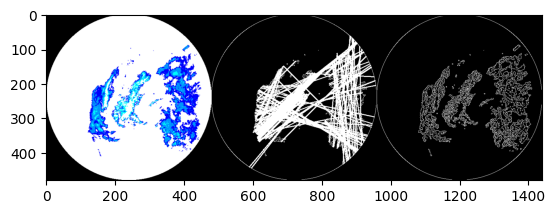

In [53]:
img = pic.get_image(600).generate_initial_mask()

lines, im = detect_interferences(img, 20)
print(lines)
plt.imshow(im)

In [45]:
def draw_white_lines(img, lines, width=2):
    for i, line in enumerate(lines_list):
        x1,y1,x2,y2 = line[0], line[1], line[2], line[3]
        img = cv2.line(np.asarray(img), (x1,y1), (x2,y2), (255,255,255), width)

    plt.imshow(result_img)
draw_white_lines(img, lines)

NameError: name 'result_img' is not defined